In [1]:
import radarsimpy

print("`RadarSimPy` used in this example is version: " + str(radarsimpy.__version__))

`RadarSimPy` used in this example is version: 13.0.1


# Receiver Operating Characteristic (ROC)

## Introduction

The Receiver Operating Characteristic (ROC) curve is a valuable tool for assessing and visualizing the performance of binary classification models or systems. It provides insights into the trade-offs between sensitivity and specificity and helps in selecting appropriate operating points based on the application's requirements.

[`RadarSimPy`](https://radarsimx.com/radarsimx/radarsimpy/) provides a suite of tools for analyzing receiver operational characteristics. Here, we present an example to illustrate the utilization of these analysis tools.

## Calculate $P_d$ from $SNR$ and $P_{fa}$

### Swerling 3 targets without integration


In [2]:
from radarsimpy.tools import roc_pd, roc_snr
import numpy as np

snr = np.arange(-10, 10, 0.1)
pfa = np.array([1e-4, 1e-5])
pd = roc_pd(pfa, snr, 64, "Swerling 3")

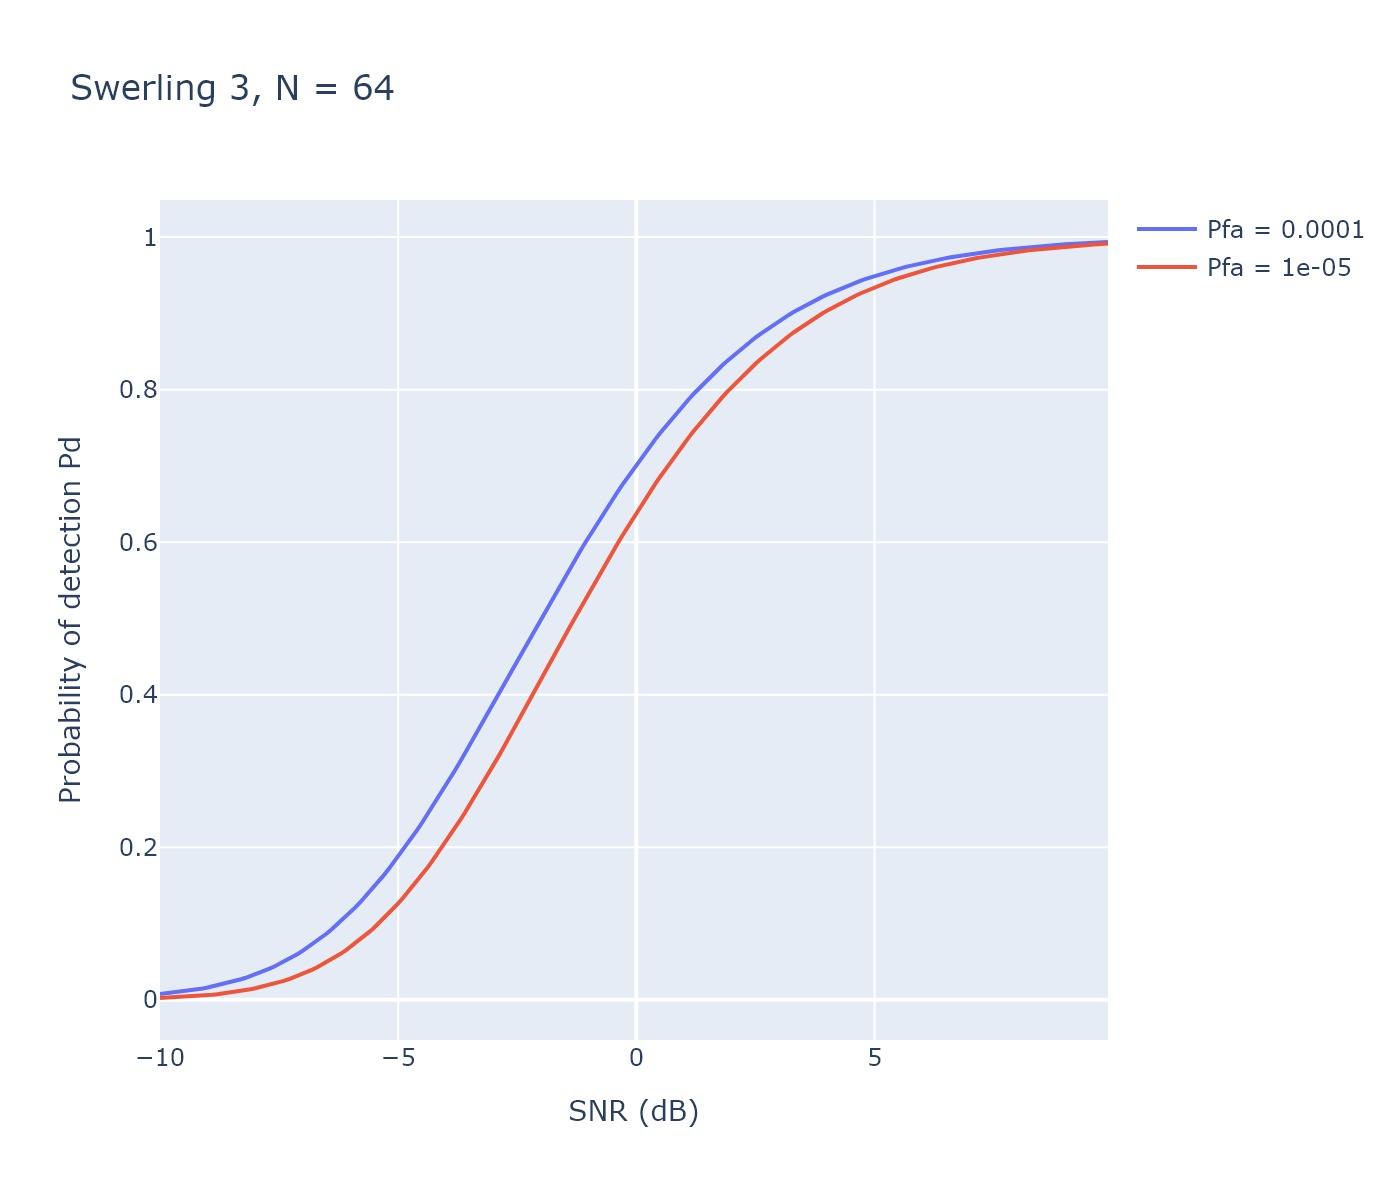

In [3]:
import plotly.graph_objs as go
from IPython.display import Image

it_pfa = np.nditer(pfa, flags=["f_index"])

fig = go.Figure()

data = []
while not it_pfa.finished:
    fig.add_trace(
        go.Scatter(x=snr, y=pd[it_pfa.index, :], name="Pfa = " + str(it_pfa[0]))
    )
    it_pfa.iternext()

fig.update_layout(
    title="Swerling 3, N = 64",
    yaxis=dict(title="Probability of detection Pd"),
    xaxis=dict(title="SNR (dB)"),
    height=600,
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

### Swerling 3 targets with 20-channel non-coherent integration


In [4]:
pd = roc_pd(pfa, snr, 20, "Swerling 3")

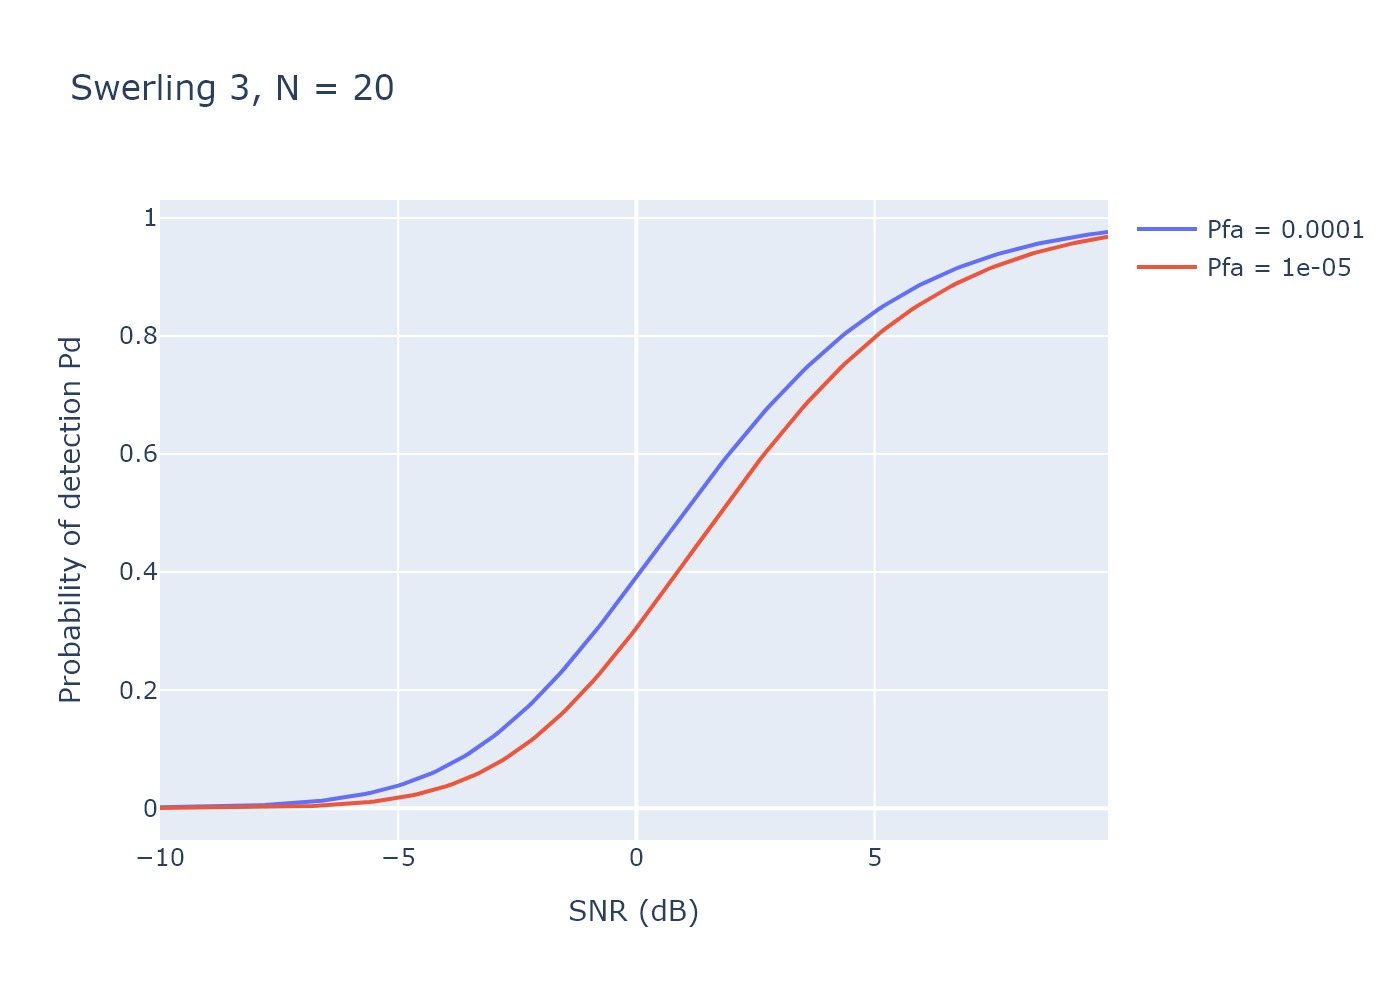

In [5]:
it_pfa = np.nditer(pfa, flags=["f_index"])

fig = go.Figure()

while not it_pfa.finished:
    fig.add_trace(
        go.Scatter(x=snr, y=pd[it_pfa.index, :], name="Pfa = " + str(it_pfa[0]))
    )
    it_pfa.iternext()

fig.update_layout(
    title="Swerling 3, N = 20",
    yaxis=dict(title="Probability of detection Pd"),
    xaxis=dict(title="SNR (dB)"),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

### Different target types


In [6]:
snr = np.arange(-10, 30, 0.1)
pfa = 1e-6
N = 5
pd_sw1 = roc_pd(pfa, snr, N, "Swerling 1")
pd_sw2 = roc_pd(pfa, snr, N, "Swerling 2")
pd_sw3 = roc_pd(pfa, snr, N, "Swerling 3")
pd_sw4 = roc_pd(pfa, snr, N, "Swerling 4")
pd_sw5 = roc_pd(pfa, snr, N, "Swerling 5")
pd_coherent = roc_pd(pfa, snr, N, "Coherent")
pd_real = roc_pd(pfa, snr, N, "Real")

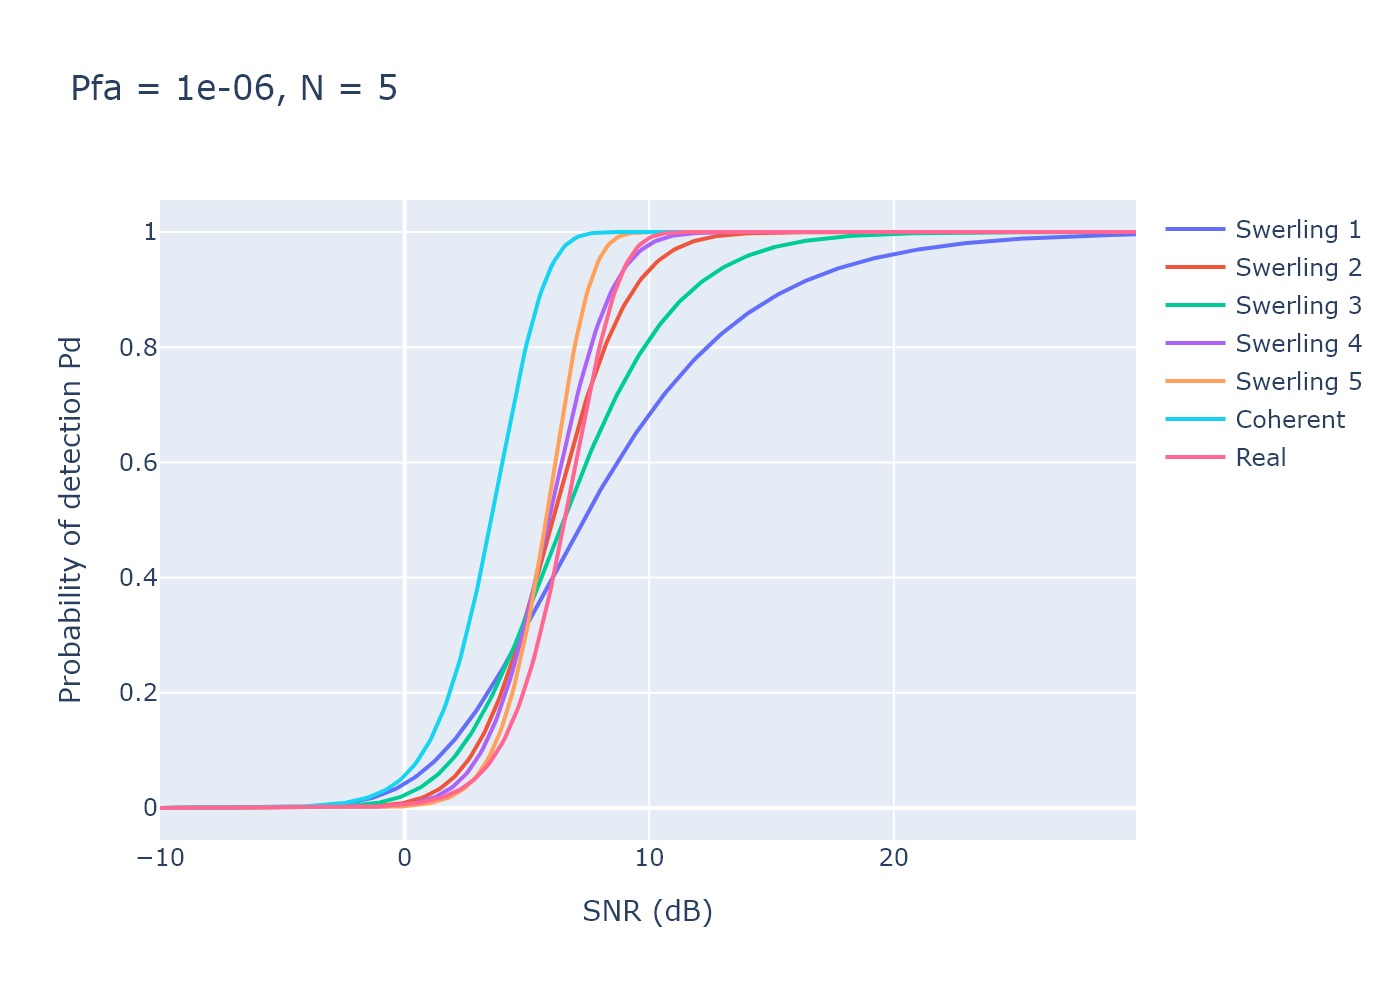

In [7]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=snr, y=pd_sw1, name="Swerling 1"))
fig.add_trace(go.Scatter(x=snr, y=pd_sw2, name="Swerling 2"))
fig.add_trace(go.Scatter(x=snr, y=pd_sw3, name="Swerling 3"))
fig.add_trace(go.Scatter(x=snr, y=pd_sw4, name="Swerling 4"))
fig.add_trace(go.Scatter(x=snr, y=pd_sw5, name="Swerling 5"))
fig.add_trace(go.Scatter(x=snr, y=pd_coherent, name="Coherent"))
fig.add_trace(go.Scatter(x=snr, y=pd_real, name="Real"))

fig.update_layout(
    title="Pfa = " + str(pfa) + ", N = " + str(N),
    yaxis=dict(title="Probability of detection Pd"),
    xaxis=dict(title="SNR (dB)"),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

## Calculate minimal required $SNR$ from $P_d$ and $P_{fa}$


In [8]:
pfa = 1e-5
pd = np.arange(0.1, 0.9, 0.01)
N = 10
snr_real = roc_snr(1e-4, pd, N, "Real")

snr_sw1 = roc_snr(pfa, pd, N, "Swerling 1")
snr_sw2 = roc_snr(pfa, pd, N, "Swerling 2")
snr_sw3 = roc_snr(pfa, pd, N, "Swerling 3")
snr_sw4 = roc_snr(pfa, pd, N, "Swerling 4")
snr_sw5 = roc_snr(pfa, pd, N, "Swerling 5")
snr_coherent = roc_snr(pfa, pd, N, "Coherent")
snr_real = roc_snr(pfa, pd, N, "Real")

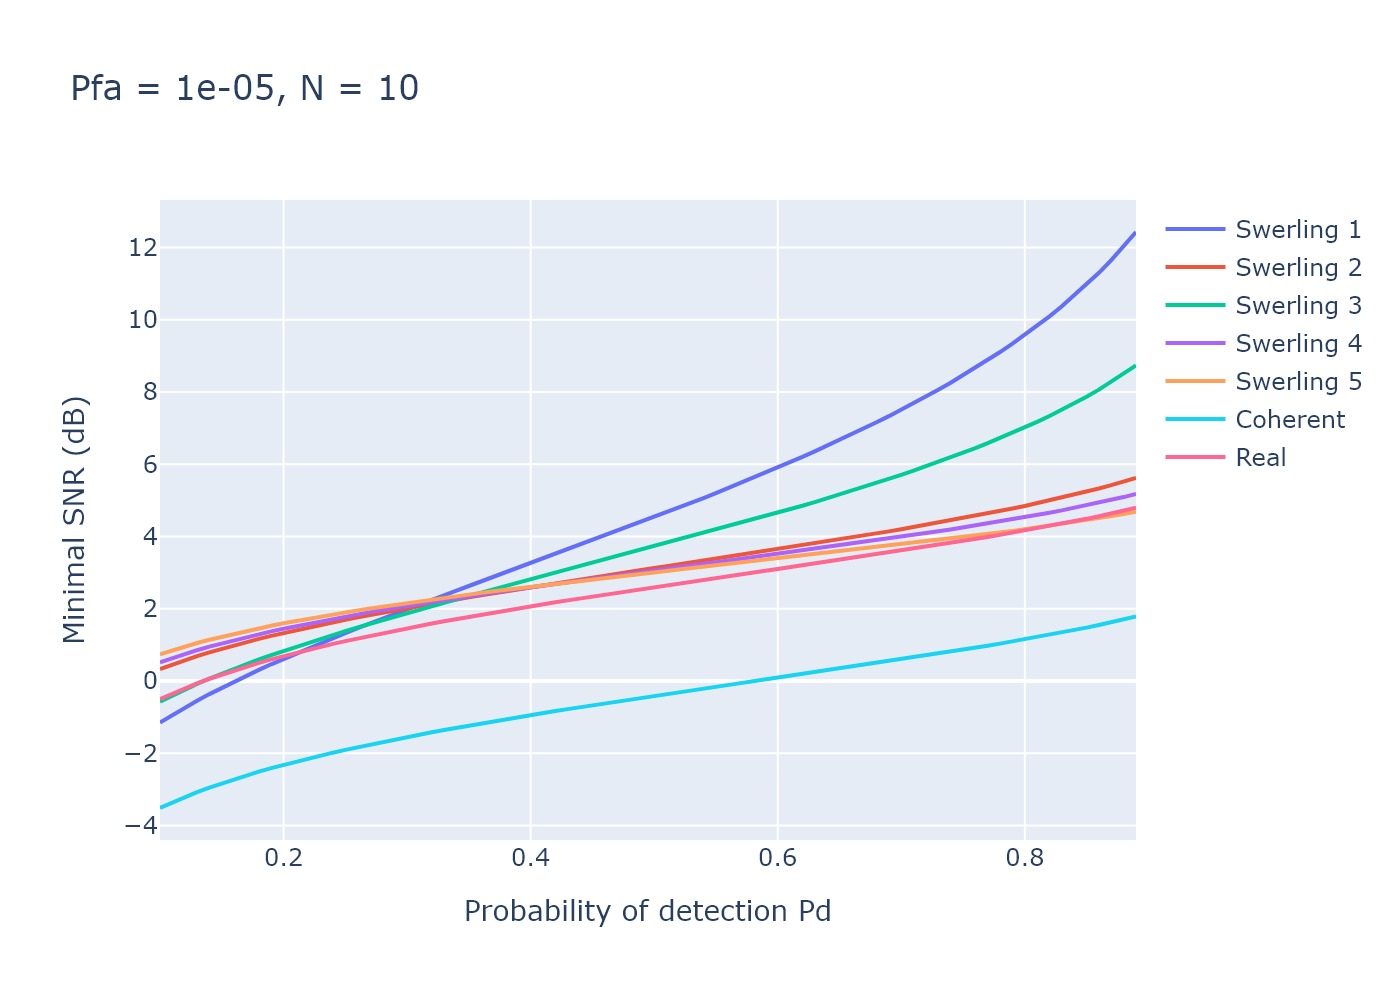

In [9]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=pd, y=snr_sw1, name="Swerling 1"))
fig.add_trace(go.Scatter(x=pd, y=snr_sw2, name="Swerling 2"))
fig.add_trace(go.Scatter(x=pd, y=snr_sw3, name="Swerling 3"))
fig.add_trace(go.Scatter(x=pd, y=snr_sw4, name="Swerling 4"))
fig.add_trace(go.Scatter(x=pd, y=snr_sw5, name="Swerling 5"))
fig.add_trace(go.Scatter(x=pd, y=snr_coherent, name="Coherent"))
fig.add_trace(go.Scatter(x=pd, y=snr_real, name="Real"))

fig.update_layout(
    title="Pfa = " + str(pfa) + ", N = " + str(N),
    xaxis=dict(title="Probability of detection Pd"),
    yaxis=dict(title="Minimal SNR (dB)"),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

## Generate a look-up table


In [10]:
# snr_sw1 = np.zeros(256)
# snr_sw2 = np.zeros(256)
# snr_sw3 = np.zeros(256)
# snr_sw4 = np.zeros(256)
# snr_sw5 = np.zeros(256)
# snr_ci = np.zeros(256)
# pd = 0.5
# pfa = 1e-4

# for N in range(1, 257):
#     snr_sw1[N-1] = roc_snr(pfa, pd, N, 'Swerling 1')
#     snr_sw2[N-1] = roc_snr(pfa, pd, N, 'Swerling 2')
#     snr_sw3[N-1] = roc_snr(pfa, pd, N, 'Swerling 3')
#     snr_sw4[N-1] = roc_snr(pfa, pd, N, 'Swerling 4')
#     snr_sw5[N-1] = roc_snr(pfa, pd, N, 'Swerling 5')
#     snr_ci[N-1] = roc_snr(pfa, pd, N, 'Coherent')


# mat = np.zeros((256, 6))
# mat[:, 0] = snr_sw1
# mat[:, 1] = snr_sw2
# mat[:, 2] = snr_sw3
# mat[:, 3] = snr_sw4
# mat[:, 4] = snr_sw5
# mat[:, 5] = snr_ci

# np.savetxt("../data/snr.csv", mat, delimiter=",")